# Анализ оттока клиентов банка

Исследование состоит из следющих частей:
* [загрузка и изучение данных](#section1):
    * [предобработка данных](#section2);
    * [изучение данных](#section3);
    * [вывод по разделу](#section4);
* [предобработка данных](#section5):
    * [корректировка названий полей](#section6);
    * [изменение типов данных](#section7);
    * [кодирование данных поля `gender`](#section8);
    * [изучение пропущенных значений](#section9);
    * [выявление дубликатов](#section10);  
    * [выявление аномалий](#section11);
    * [вывод по разделу](#section12);
* [исследовательский анализ данных](#section13):
    * [анализ средних значений и изучение признаков](#section14);
    * [анализ средних значений и изучение признаков по группам в зависимости от оттока](#section15);
    * [анализ распределения количественных признаков](#section16);
    * [анализ матрицы корреляций](#section17);
    * [составление портрета пользователя в зависимости от признака оттока](#section18);
    * [вывод по разделу](#section19);
* [проверка гипотез](#section20):
    * [формулировка гипотез](#section21);
    * [различие средних значений баллов кредитного скоринга у оставшихся клиентов, и клиентов, ушедших в отток](#section22);
    * [различие средних значений баланса у оставшихся клиентов, и клиентов, ушедших в отток](#section23);
    * [различие средней оценочной зарплаты оставшихся клиентов, и клиентов, ушедших в отток](#section24);
    * [вывод по разделу](#section25); 
* [сегментация сегментов](#section26);
* [рекомендации](#section27).

<a id='section1'></a>
## Загрузка и изучение данных<a id='section1'></a>

<a id='section2'></a>
### Загрузка данных

Загрузим необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from datetime import datetime, timedelta
from scipy import stats as st

Для корректного отображения чисел скорретируем формат:

In [2]:
pd.options.display.float_format ='{:,.2f}'.format

Загрузим данные и сохраним их в переменную `bank_scrooge`:

In [3]:
bank_scrooge = pd.read_csv(path)

<a id='section3'></a>
### Изучение данных

Выведем первые 10 строк датафрейма `bank_scrooge` и получим информацию о датафрейме:

In [4]:
bank_scrooge.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.34",0
3,225363,866.00,Ярославль,Ж,51,5,"1,524,746.26",2,0,1,"174,423.53",1
4,157978,730.00,Ярославль,М,34,5,174.00,1,1,0,"67,353.16",1
5,202305,856.00,Рыбинск,М,56,4,"863,687.24",3,1,0,"156,619.80",0
6,177259,807.00,Ярославль,Ж,39,3,"405,042.44",3,0,1,"103,838.32",0
7,218868,825.00,Ярославль,Ж,38,4,"458,145.40",2,1,1,"68,085.48",0
8,211686,923.00,Ярославль,М,54,5,"1,206,337.87",2,1,0,"155,371.79",0
9,133130,906.00,Ярославль,Ж,67,0,NaN,1,0,1,"238,055.53",0


In [5]:
bank_scrooge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


В датафрейме `bank_scrooge` 10000 записей и 12 полей, из которых 7 с типом `int64`, 3 с типом `float64` и 2 поля с типом `object`. 

Датафрейм содержит следующие поля:
* `USERID` - идентификатор клиента;
* `score` - баллы кредитного скоринга;
* `city` - город клиента;
* `gender` - пол клиента;
* `age` - возраст клиента;
* `equity` - оценка собственности клиента;
* `balance` - баланс на счете клиента;
* `products` - количество продуктов, которыми пользуется клиент;
* `credit_card` - признак по наличию кредитной карты;
* `last_activity` - признак по активности клиента в за последний календарный месяц;
* `EST_SALARY` - оценочная заработная плата клиента;
* `churn` - признак оттока.

Каждая запись датафрейма `bank_scrooge` содержит данные об одном клиенте банка. Названия полей `USERID` и `EST_SALARY` следует привести к нижнему регистру. Разница в количестве непустых значений свидетельствует о пропусках в поле `balance`. Данные поля `score` целесообразно привести к целочисленному формату. Кроме того, целесообразно закодировать значения поля `gender` - добавить в датафрейм поле с числовыми значениями в зависимости от пола клиента.

<a id='section4'></a>
### Вывод

Данные для исследования представлены в одном датафрейме. Для исследовательского анализа данные необходимо подготовить - скорректировать наименования полей, изменить тип данных поля `score`, изучить отсутствующие значения в поле `balance`, добавить поле с числовыми значениями в зависимости от поля `gender`. Также необходимо убедиться, что в данных отсутствуют явные и неявные дубликаты и аномалии.

<a id='section5'></a>
## Предобработка данных

<a id='section6'></a>
### Корректировка названий полей

Скорректируем названия полей датафрейма `bank_scrooge` - приведем их к нижнему регистру:

In [6]:
bank_scrooge.columns = bank_scrooge.columns.str.lower()

<a id='section7'></a>
### Изменение типов данных

Изменим тип данных поля `score` - с вещественного на целочисленный:

In [7]:
bank_scrooge['score'] = bank_scrooge['score'].astype('int')

<a id='section8'></a>
### Кодирование данных поля `gender`

Добавим в датафрейм `bank_scrooge` поле `gender_new` с числовыми значениями данных поля `gender`:

In [8]:
bank_scrooge['gender_male'] = bank_scrooge['gender']
bank_scrooge['gender_male'] = bank_scrooge['gender_male'].replace({'М' : 1, 'Ж' : 0})

In [9]:
bank_scrooge.head(10)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_male
0,183012,850,Рыбинск,Ж,25,1,"59,214.82",2,0,1,"75,719.14",1,0
1,146556,861,Рыбинск,Ж,37,5,"850,594.33",3,1,0,"86,621.77",0,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.34",0,0
3,225363,866,Ярославль,Ж,51,5,"1,524,746.26",2,0,1,"174,423.53",1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,"67,353.16",1,1
5,202305,856,Рыбинск,М,56,4,"863,687.24",3,1,0,"156,619.80",0,1
6,177259,807,Ярославль,Ж,39,3,"405,042.44",3,0,1,"103,838.32",0,0
7,218868,825,Ярославль,Ж,38,4,"458,145.40",2,1,1,"68,085.48",0,0
8,211686,923,Ярославль,М,54,5,"1,206,337.87",2,1,0,"155,371.79",0,1
9,133130,906,Ярославль,Ж,67,0,NaN,1,0,1,"238,055.53",0,0


Других полей с упорядоченными категориальными переменными, которые можно кодировать, в датафрейме `bank_scrooge` нет. 

<a id='section9'></a>
### Изучение пропущенных значений

Определим количество пропущенных значений в датафрейме `bank_scrooge`:

In [10]:
bank_scrooge.isna().sum()

userid              0
score               0
city                0
gender              0
age                 0
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
gender_male         0
dtype: int64

Как было отмечено выше, в датафрейме `bank_scrooge` пропуски присутствуют только в поле `balance`. В этом поле отсутствует почти 23% значений. Проанализируем взаимосвязь пропусков и переменных. Выведем средние значения переменных и распределение по городам в зависимости от наличия пропусков в поле `balance`:

In [11]:
#выведем средние значения величин для записей с пропущенными значениями
bank_scrooge[bank_scrooge['balance'].isna()].mean()

userid          172,069.45
score               865.35
age                  41.85
equity                0.05
balance                NaN
products              1.16
credit_card           0.82
last_activity         0.55
est_salary      226,310.21
churn                 0.01
gender_male           0.56
dtype: float64

In [12]:
#выведем средние значения величин для записей без пропущенных значений
bank_scrooge[bank_scrooge['balance'].notna()].mean()

userid          171,738.84
score               843.74
age                  43.13
equity                3.40
balance         827,794.31
products              2.09
credit_card           0.64
last_activity         0.52
est_salary      124,501.87
churn                 0.23
gender_male           0.48
dtype: float64

In [13]:
bank_scrooge['balance_na'] = np.where(bank_scrooge['balance'].isna(), 1, 0)
bank_scrooge.groupby('city').agg({'balance_na' : 'mean'})

,balance_na
city,
Ростов,0.17
Рыбинск,0.22
Ярославль,0.25


По доле пропущенных значений в зависимости от города очевидно, что чем больше клиентов в городе, тем больше пропусков. Это похоже на взаимосвязь. Кроме того, значительное расхождение по средним значениям заметно по полям `equity`, `products` и `est_salary`. Исследуем их более подробно. Начнем с данных поля `equity`:

In [15]:
bank_scrooge = bank_scrooge.drop(columns = 'balance_na') #удалим поле за неданобностью
bank_scrooge[bank_scrooge['balance'].isna()]['equity'].value_counts(ascending=False)

0    2180
1     114
3       1
Name: equity, dtype: int64

Почти 95% записей с пропущенными значениями соответствуют чуть более 84% клиентов с оценкой стоимости, равной `0`. При этом клиенты с оценкой стоимости, равной `0`, составляют около 26% от совокупного количества клиентов в датафрейме. Кроме того, очевидно, что чем выше значение оценки собственности, тем меньше пропущенных значений. Можно предположить, что между данными поля `equity` и пропусками в поле `balance` есть взаимосвязь. Изучим данные поля `products`:

In [16]:
bank_scrooge[bank_scrooge['balance'].isna()]['products'].value_counts(ascending=False)

1    1950
2     315
3      29
0       1
Name: products, dtype: int64

85% записей с пропущенными значениями приходятся на 58% клиентов с одним банковским продуктом. При этом чем больше продуктов, тем меньше пропусков. Можно предположить, что между данными поля `products` и пропусками в поле `balance` также присутствует взаимосвязь.  Изучим данные поля `est_salary` - выведем описание данных и построим гистограмму:

In [17]:
#выведем описание поля для записей с пропущенными значениями
bank_scrooge[bank_scrooge['balance'].isna()]['est_salary'].describe()

count       2,295.00
mean      226,310.21
std       199,771.79
min        20,274.03
25%       120,347.70
50%       174,160.68
75%       240,014.99
max     1,333,687.36
Name: est_salary, dtype: float64

In [18]:
#выведем описание поля для записей без пропущенных значений
bank_scrooge[bank_scrooge['balance'] >= 0]['est_salary'].describe()

count       7,705.00
mean      124,501.87
std       104,663.54
min         2,546.30
25%        67,551.81
50%       106,222.20
75%       155,045.67
max     1,395,064.45
Name: est_salary, dtype: float64

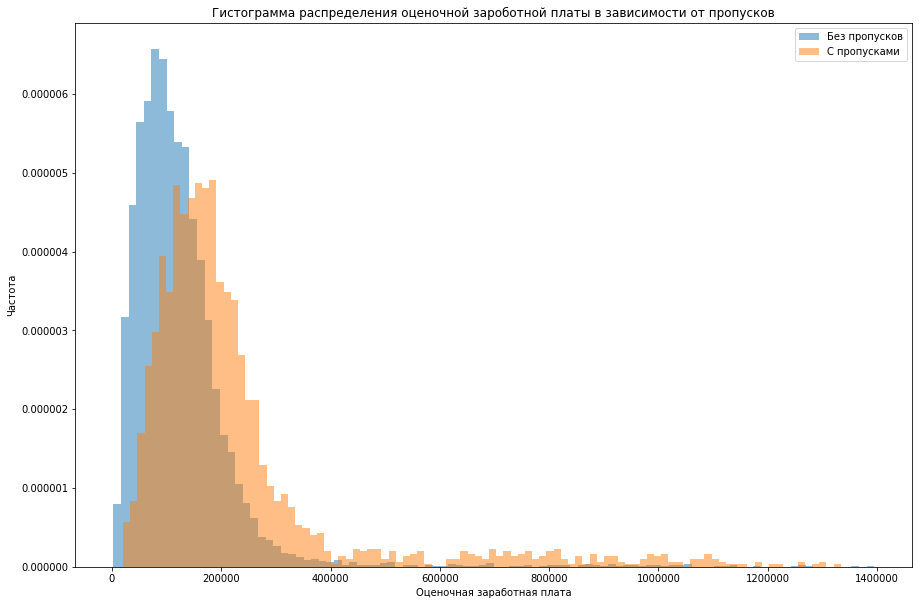

In [19]:
plt.subplots(figsize=[15,10])
plt.ticklabel_format(style='plain')
bank_scrooge[bank_scrooge['balance'] >= 0]['est_salary'].plot(kind='hist', alpha=0.5, bins=100, density=True)
bank_scrooge[bank_scrooge['balance'].isna()]['est_salary'].plot(kind='hist', alpha=0.5, bins=100, density=True)
plt.legend(['Без пропусков', 'С пропусками'])
plt.ylabel('Частота')
plt.xlabel('Оценочная заработная плата')
plt.title('Гистограмма распределения оценочной зароботной платы в зависимости от пропусков')
plt.show()

Большее среднее значение поля `est_salary` у записей с пропусками обусловлено большим количеством выбросов, о чем свидетельствует разница между медианой и средним, а также значение стандартного отклонения. Очевидно, что чем больше сумма на счете, тем больше пропусков. Можно предположить, что между данными поля `est_salary` и пропусками в поле `balanсe` присутствует взаимосвязь. На основании наших предположений примем, что пропуски зависят от данных и заполнить их какими-либо достоверными значениями из-за отсуствия соотвествующей информации невозможно - оставим пропуски незаполненными. Предполагаемая причина пропусков - ошибка в инфомационных системах банка, которая могла произойти в процессе загрузки данных, хранения или выгрузки.

<a id='section10'></a>
### Выявление дубликатов

Проверим датафрейм `bank_scrooge` на наличие явных дубликатов:

In [21]:
bank_scrooge.duplicated().sum()

1

В датафрейме присутсвует один явный дубликат. Удалим его:

In [22]:
bank_scrooge = bank_scrooge.drop_duplicates().reset_index(drop=True)

В датафрейме могут присутствовать неявные дубликаты - одинаковые пользователи с разными идентификаторами. Проверим датафрейм на их наличие:

In [23]:
bank_scrooge[
    [
        'score', 
        'city',
        'gender',
        'age',
        'equity',
        'balance',
        'products',
        'credit_card',
        'last_activity',
        'est_salary',
        'churn'
    ]
].duplicated().sum()

0

Неявные дубликаты в датафрейме отсутствуют.

<a id='section11'></a>
### Выявление аномалий

Проверим поля с переменными на наличие аномалий. Начнем с поля `city`:

In [24]:
bank_scrooge['city'].value_counts()

Ярославль    5905
Рыбинск      2663
Ростов       1431
Name: city, dtype: int64

В поле `city` аномалий нет. Проверим поле `gender`:

In [25]:
bank_scrooge['gender'].value_counts()

М    5007
Ж    4992
Name: gender, dtype: int64

В поле `gender` аномалии отсутствуют. Проверим поле `equity`:

In [26]:
bank_scrooge['equity'].value_counts()

0    2591
5    1918
4    1850
3    1543
2    1052
1     774
6     161
7      80
8      17
9      13
Name: equity, dtype: int64

В поле `equity` аномалий нет. Проверим поле `products`:

In [27]:
bank_scrooge['products'].value_counts()

2    5108
1    3340
3    1046
4     474
5      30
0       1
Name: products, dtype: int64

В датафрейме присутствует 1 клиент, у которого нет продуктов банка, что не может соответствовать действительности. Выведем запись с этим клиентом:

In [28]:
bank_scrooge[bank_scrooge['products'] == 0]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_male
8957,147837,962,Рыбинск,Ж,79,3,NaN,0,0,0,"25,063.96",1,0


По каким либо иным признакам определить количесто продуктов у этого клиента невозможно. Удалим запись с этим клиентом из датафрейма:

In [29]:
bank_scrooge = bank_scrooge[bank_scrooge['products'] > 0]

В поле `equity` аномалий нет. Проверим поле `credit_card`:

In [30]:
bank_scrooge['credit_card'].value_counts()

1    6803
0    3195
Name: credit_card, dtype: int64

В поле `credit_card` аномалии отсутствуют. Проверим поле `last_activity`:

In [31]:
bank_scrooge['last_activity'].value_counts()

1    5235
0    4763
Name: last_activity, dtype: int64

В поле `last_activity` аномалий нет. Проверим поле `churn`:

In [32]:
bank_scrooge['churn'].value_counts()

0    8177
1    1821
Name: churn, dtype: int64

Аномалий в поле `churn` нет.

<a id='section12'></a>
### Вывод

В процессе предобработки удалили из датафрейма дубликаты и записи с аномалиями, скорректировали наименования полей датафрейма, изучили пропуски и заполнили их, добавили поле с кодированными значениями поля `gender`. Можем переходить к анализу данных.

<a id='section13'></a>
## Исследовательский анализ данных

<a id='section14'></a>
### Анализ средних значений и изучение признаков

Проанализируем средние значения и изучим признаки по всем клиентам банка:

In [33]:
bank_scrooge[
    [
        'score',
        'age',
        'equity',
        'products',
        'credit_card',
        'last_activity',
        'est_salary',
        'balance',
        'churn',
        'gender_male',
    ]
].describe()

,score,age,equity,products,credit_card,last_activity,est_salary,balance,churn,gender_male
count,"9,998.00","9,998.00","9,998.00","9,998.00","9,998.00","9,998.00","9,998.00","7,705.00","9,998.00","9,998.00"
mean,848.68,42.83,2.63,1.87,0.68,0.52,"147,855.76","827,794.31",0.18,0.50
std,65.44,12.12,1.98,0.80,0.47,0.50,"139,377.39","1,980,614.15",0.39,0.50
min,642.00,18.00,0.00,1.00,0.00,0.00,"2,546.30",0.00,0.00,0.00
25%,802.00,34.00,0.00,1.00,0.00,0.00,"75,252.07","295,554.16",0.00,0.00
50%,853.00,40.00,3.00,2.00,1.00,1.00,"119,658.10","524,272.20",0.00,1.00
75%,900.00,51.00,4.00,2.00,1.00,1.00,"174,499.81","980,705.85",0.00,1.00
max,"1,000.00",86.00,9.00,5.00,1.00,1.00,"1,395,064.45","119,113,552.01",1.00,1.00


По средним значениям признаков можно сделать слеующие выводы:
* средний кредитный рейтинг составляет почти 850;
* средний возраст клиента - 43 года, при этом среди клиентов пристутсвуют как молодежь, так и пенсионеры;
* средняя оценка собственности клиента - 2.6;
* в среднем у клиентов около двух продуктов банка;
* у 68% клиентов есть кредитная карта банка;
* среднее значение баланса на счетах - 828 тысяч рублей, при этом разница между средним и медианой, а также значение стандартного отклонения говорят о том, что в поле `balance` присутствует много выбросов
* чуть более половины клиентов пользовались услугами банка за последний календарный месяц;
* средняя оценочная зарплата клиента банка составляет около 150 тысяч рублей, при этом значение стандартного отклонения свидетельствует о том, что в поле `est_salary` присутствуют выдающиеся значения;
* в отток ушло 18% клиентов.

Проанализируем распределение клиентов банка по городам:

In [34]:
bank_scrooge['city'].value_counts()

Ярославль    5905
Рыбинск      2662
Ростов       1431
Name: city, dtype: int64

59% клиентов банка проживают в Ярославле, 26,6% - в Рыбинске, 14,3% - в Ростове.

<a id='section15'></a>
### Анализ средних значений и изучение признаков по группам в зависимости от оттока

Проанализируем средние значения и изучим признаки по группам клиентов в зависимости от оттока:

In [35]:
bank_scrooge[
    [
        'score',
        'age',
        'equity',
        'products',
        'credit_card',
        'last_activity',
        'est_salary',
        'gender_male',
        'churn'
    ]
].groupby('churn').agg('mean').T

churn,0,1
score,845.41,863.36
age,43.16,41.38
equity,2.37,3.76
products,1.76,2.38
credit_card,0.71,0.55
last_activity,0.48,0.70
est_salary,"147,764.05","148,267.60"
gender_male,0.47,0.65


Остановимся на тех признаках, средние значения которых значительно отличаются. По средним значениям таких признаков можно сделать слеующие выводы:
* у клиентов, ушедших в отток, среднее значение оценки собственности выше - 3,76 против 2,37;
* у клиентов, ушедших в отток, среднее количество банковских продуктов больше - 2,38 против 1,76;
* клиенты, ушедшие в отток, реже пользуются кредитными картами - 55% против 71%;
* cредний баланс у клиентов, ушедших в отток, в 1,5 раза превышает средний баланс оставшихся клиентов
* клиенты, ушедшие в отток, более активно пользовались услугами банка за последний календарный месяц - 70% против 48%;
* среди клиентов, ушедших в отток, мужчин больше - 65% против 47%.

Проанализируем долю оттока по городам:

In [36]:
bank_scrooge.groupby('city').agg({'churn' : 'mean'})

,churn
city,
Ростов,0.19
Рыбинск,0.16
Ярославль,0.19


Доля клиентов, ушедших в отток, в зависимости от города отличается незначительно и близка к среднему значению оттока по банку.

<a id='section16'></a>
### Анализ распределения количественных признаков

Изучим распределения признаков по оставшимся клиентам и клиентам, ушедшим в отток. Построим гистограмму распределения оценок собственности по клиентам, ушедшим в отток, и оставшимся клиентам:

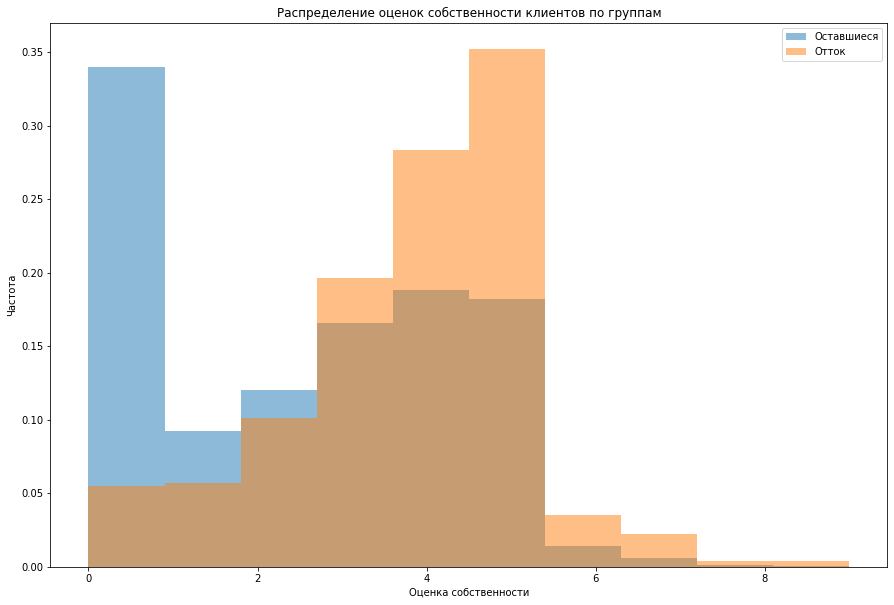

In [37]:
plt.figure(figsize=(15,10))
bank_scrooge['equity'][bank_scrooge['churn'] == 0].plot(kind='hist', alpha=0.5, bins=10, density=True)
bank_scrooge['equity'][bank_scrooge['churn'] == 1].plot(kind='hist', alpha=0.5, bins=10, density=True)
plt.title('Распределение оценок собственности клиентов по группам')
plt.xlabel('Оценка собственности')
plt.ylabel('Частота')
plt.legend(['Оставшиеся', 'Отток'])
plt.show()

У оставшихся клиентов пик гистограммы приходится на оценку `0`, у ушедших в отток - на оценку `5`. У оставшихся клиентов редко встречаются оценки больше `5`, у ушедших в отток - больше `7`. Построим гистограмму распределения количества банковских продуктов по клиентам, ушедшим в отток, и оставшимся клиентам:

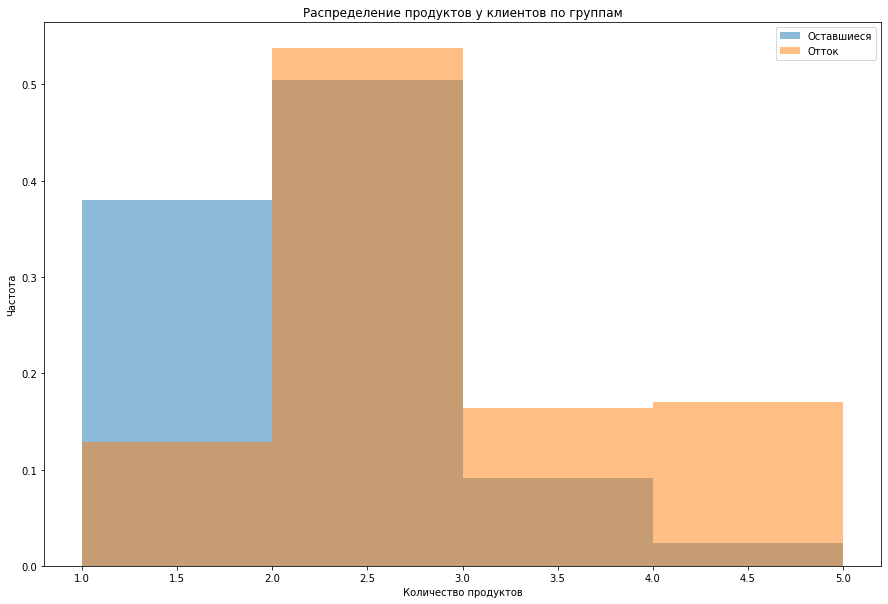

In [38]:
plt.figure(figsize=(15,10))
bank_scrooge['products'][bank_scrooge['churn'] == 0].plot(kind='hist', alpha=0.5, bins=4, density=True)
bank_scrooge['products'][bank_scrooge['churn'] == 1].plot(kind='hist', alpha=0.5, bins=4, density=True)
plt.title('Распределение продуктов у клиентов по группам')
plt.xlabel('Количество продуктов')
plt.ylabel('Частота')
plt.legend(['Оставшиеся', 'Отток'])
plt.show()

И у оставшихся клиентов, и у клиентов, ушедших в отток, пики гистограмм приходятся на 2 продукта, однако среди клиентов, ушедших в отток, чаще встречаются те, у кого 3 и более продуктов. Построим гистограмму распределения баланса по клиентам, ушедшим в отток, и оставшимся клиентам:

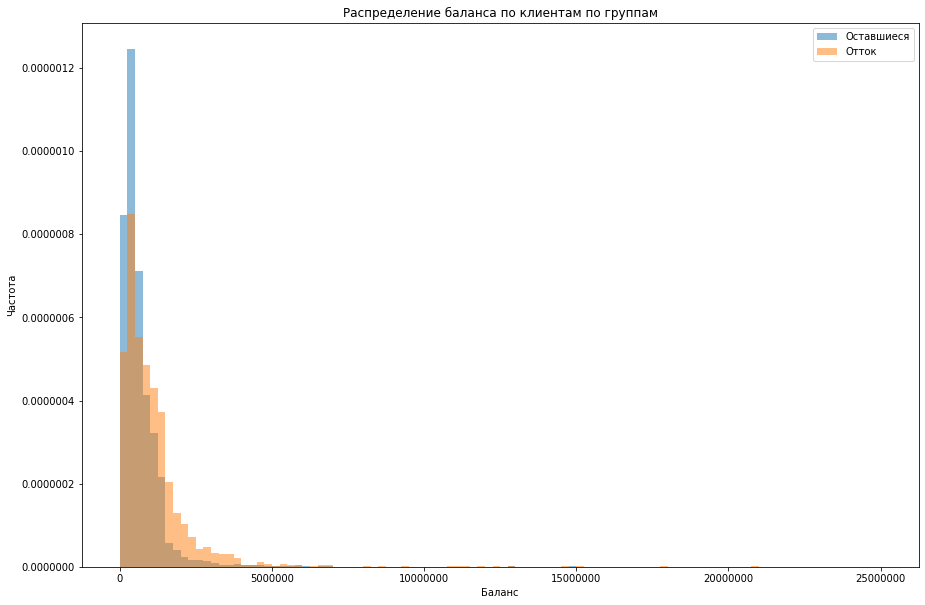

In [39]:
plt.figure(figsize=(15,10))
plt.ticklabel_format(style='plain')
bank_scrooge[
    'balance'
][
    bank_scrooge['churn'] == 0
].plot(
    kind='hist', 
    alpha=0.5, bins=100,
    range=(0,25000000),
    density=True
)
bank_scrooge[
    'balance'
][    
    bank_scrooge['churn'] == 1
].plot(
    kind='hist', 
    alpha=0.5, 
    bins=100,
    range=(0,25000000),
    density=True
)
plt.title('Распределение баланса по клиентам по группам')
plt.xlabel('Баланс')
plt.ylabel('Частота')
plt.legend(['Оставшиеся', 'Отток'])
plt.show()

Очевидно, что у клиентов, ушедших в отток, больше крупных сумм на балансе, чем у оставшихся клиентов. Построим гистограмму распределения возраста по клиентам, ушедшим в отток, и оставшимся клиентам:

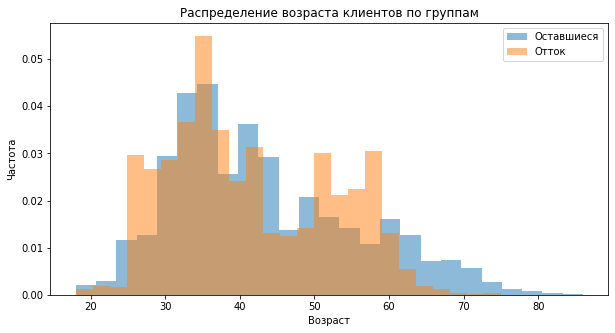

In [40]:
plt.figure(figsize=(10,5))
bank_scrooge['age'][bank_scrooge['churn'] == 0].plot(kind='hist', alpha=0.5, bins=25, density=True)
bank_scrooge['age'][bank_scrooge['churn'] == 1].plot(kind='hist', alpha=0.5, bins=25, density=True)
plt.title('Распределение возраста клиентов по группам')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.legend(['Оставшиеся', 'Отток'])
plt.show()

Пики гистограмм приходятся примерно на 35 лет, при этом среди клиентов, ушеших в отток, клиенты в таком возрасте встречаются чаще. На диаграмме заметны два интервала оттока - примерно с 25 по 35 лет и с 50 по 59 лет. Проанализируем их более детально:

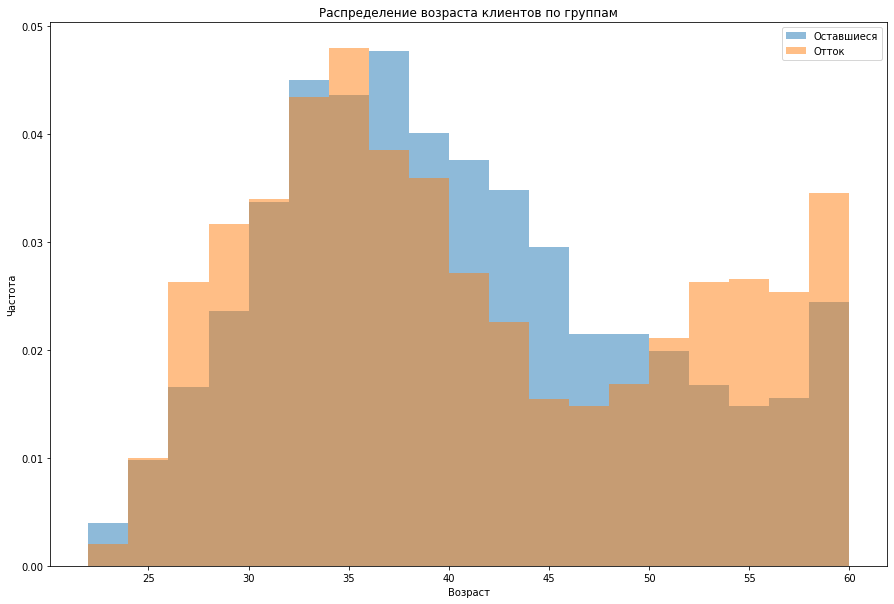

In [41]:
plt.figure(figsize=(15,10))
bank_scrooge['age'][bank_scrooge['churn'] == 0].plot(kind='hist', alpha=0.5, bins=range(22,62,2), density=True)
bank_scrooge['age'][bank_scrooge['churn'] == 1].plot(kind='hist', alpha=0.5, bins=range(22,62,2), density=True)
plt.title('Распределение возраста клиентов по группам')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.legend(['Оставшиеся', 'Отток'])
plt.show()

На гистграмме ярко выражены два интервала оттока - с 24 лет по 35 лет включительно и с 50 по 59 лет включительно. Построим гистограмму распределения кредитного скоринга по клиентам, ушедшим в отток, и оставшимся клиентам:

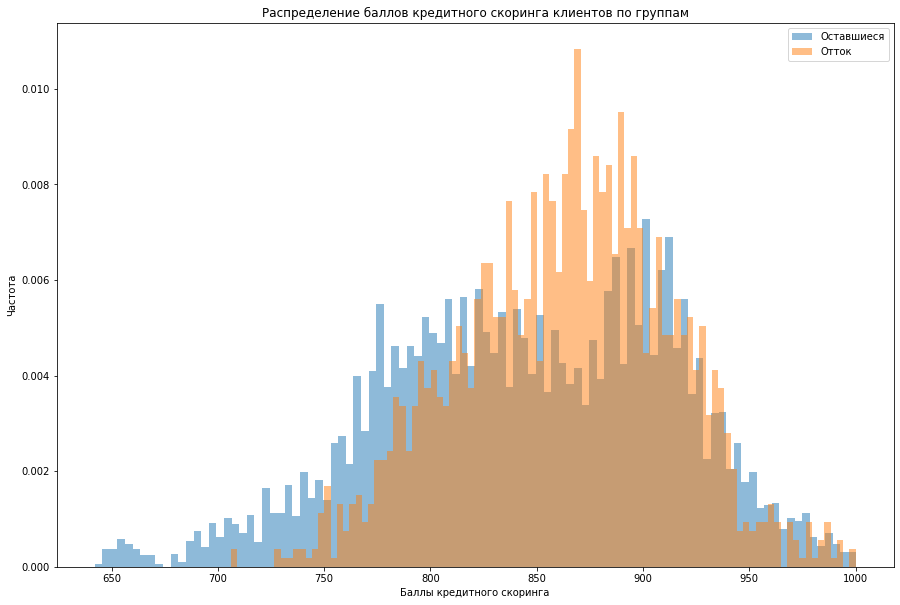

In [42]:
plt.figure(figsize=(15,10))
bank_scrooge['score'][bank_scrooge['churn'] == 0].plot(kind='hist', alpha=0.5, bins=100, density=True)
bank_scrooge['score'][bank_scrooge['churn'] == 1].plot(kind='hist', alpha=0.5, bins=100, density=True)
plt.title('Распределение баллов кредитного скоринга клиентов по группам')
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Частота')
plt.legend(['Оставшиеся', 'Отток'])
plt.show()

Среди клиентов, ушедших в отток, чаще встречаются клиены с суммой баллов кредитного скоринга в диапазоне от 800 до 900, а среди оставшихся клиентов - клиенты с суммой баллов менее 800 и более 900. Построим гистограмму распределения оценочной заработной платы по клиентам, ушедшим в отток, и оставшимся клиентам:

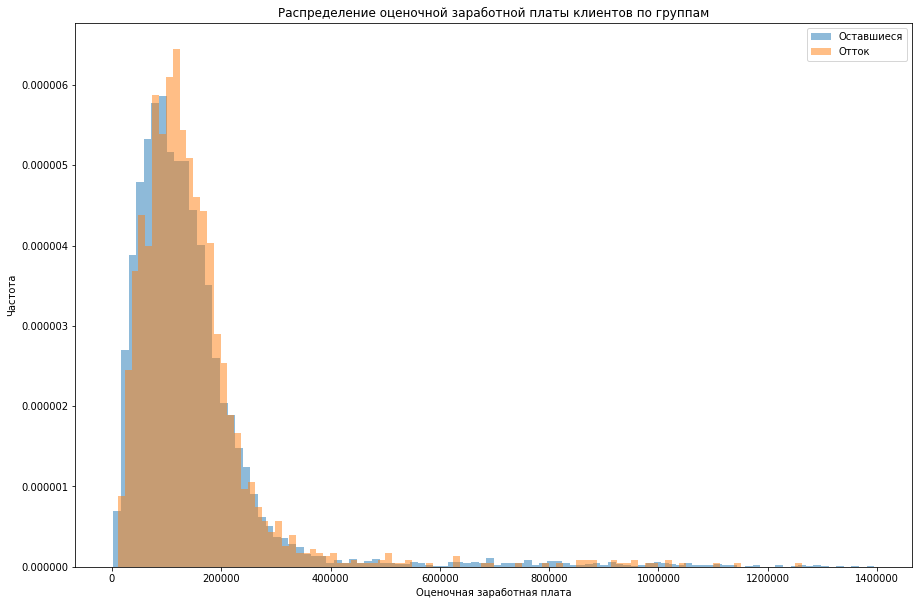

In [43]:
plt.figure(figsize=(15,10))
plt.ticklabel_format(style='plain')
bank_scrooge['est_salary'][bank_scrooge['churn'] == 0].plot(kind='hist', alpha=0.5, bins=100, density=True)
bank_scrooge['est_salary'][bank_scrooge['churn'] == 1].plot(kind='hist', alpha=0.5, bins=100, density=True)
plt.title('Распределение оценочной заработной платы клиентов по группам')
plt.xlabel('Оценочная заработная плата')
plt.ylabel('Частота')
plt.legend(['Оставшиеся', 'Отток'])
plt.show()

Гистограммы почти поторяют друг друга, разница между распределениями неочевидна.

<a id='section17'></a>
### Анализ матрицы корреляций

Рассчитаем и визуализируем матрицу корреляций и отдельно отобразим столбец с целевой переменной:

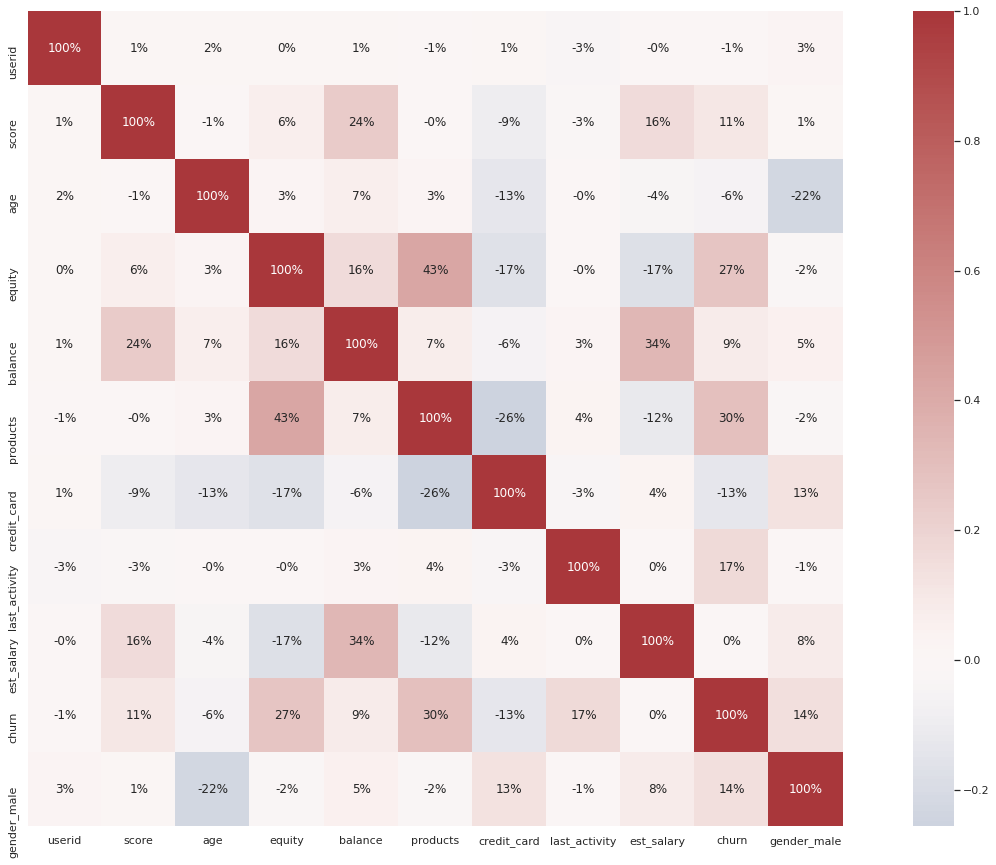

In [44]:
cm = bank_scrooge.corr()
sns.set(rc = {'figure.figsize':(25,15)})
sns.heatmap(
    cm, 
    annot=True,
    fmt='.0%',
    cmap='vlag',
    center=0,
    square=True)
plt.show()

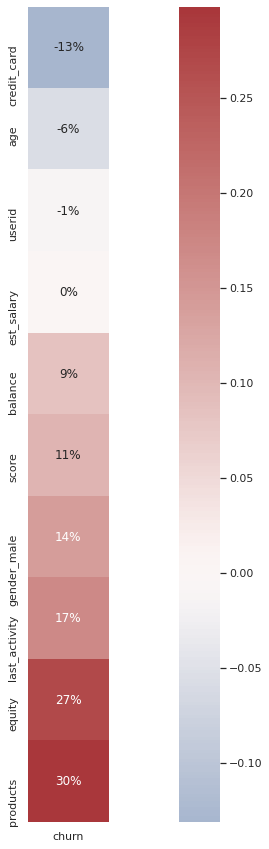

In [45]:
sns.heatmap(
    cm.loc[:,['churn']].drop('churn').sort_values('churn'), 
    annot=True,
    fmt='.0%',
    cmap='vlag',
    center=0,
    square=True)
plt.show()

Примем следующие признаки с максимальными значениями корреляции, как наиболее влияющие на отток:
* количество продуктов;
* оценка собственности клиента; 
* признак активности клиента за последний календарный месяц;
* пол клиента;
* признак по наличию кредитной карты.

На основе этих признаков построим портреты пользователей - ушедших в отток и оставшихся. Кроме того, добавим в портреты клиентов характерные значения признаков `age`, `balance` и `age`.

<a id='section18'></a>
### Составление портрета пользователя в зависимости от признака оттока

Для составления портрета пользователя в зависимости от признака оттока определим значения признаков, наиболее влияющих на отток, при которых можно утверждать, что пользователи скорее уходят в отток, чем остаются. Начнем с признака `products`:

In [46]:
productsChurnShare = bank_scrooge.pivot_table(
    index='products',
    values='userid',
    columns='churn',
    aggfunc='count'
)
productsChurnShare = productsChurnShare.reset_index()
productsChurnShare['full_count'] = productsChurnShare[[0, 1]].sum(axis='columns') 
productsChurnShare['churn_share'] = productsChurnShare[1] / productsChurnShare['full_count']
productsChurnShare = productsChurnShare[['products', 'churn_share']]
productsChurnShare.columns = ['products', 'churn_share']
productsChurnShare

,products,churn_share
0,1,0.07
1,2,0.19
2,3,0.28
3,4,0.63
4,5,0.30


Очевидно, что пользователи, у которых 3 продукта, скорее уходят в отток, чем остаюся - доля ушедших в отток пользователей в этой категории составляет 28%, что значительно превышает среднее значение оттока по банку. Определим значение признака `equity`, при котором можно утверждать, что клиенты скорее уходят в отток:

In [47]:
equityChurnShare = bank_scrooge.pivot_table(
    index='equity',
    values='userid',
    columns='churn',
    aggfunc='count'
)
equityChurnShare = equityChurnShare.reset_index()
equityChurnShare['full_count'] = equityChurnShare[[0, 1]].sum(axis='columns') 
equityChurnShare['churn_share'] = equityChurnShare[1] / equityChurnShare['full_count']
equityChurnShare = equityChurnShare[['equity', 'churn_share']]
equityChurnShare.columns = ['equity', 'churn_share']
equityChurnShare

,equity,churn_share
0,0,0.03
1,1,0.12
2,2,0.16
3,3,0.21
4,4,0.25
5,5,0.30
6,6,0.36
7,7,0.46
8,8,0.35
9,9,0.54


Очевидно, что пользователи, у которых оценка собственности равна 3, скорее уходят в отток, чем остаюся - доля ушедших в отток пользователей в этой категории составляет 21%, что превышает среднее значение оттока по банку. Для определения значения признака `balance`, при котором клиенты уходят в отток  категоризируем значения этого признака:

In [48]:
#функция для категоризации
def balance_group(balance):
    
    if balance <= 500000:
        return 0.5
    if balance > 500000 and balance <= 1000000:
        return 1
    if balance > 1000000 and balance <= 1500000:
        return 1.5
    if balance > 1500000 and balance <= 2000000:
        return 2
    if balance > 2000000 and balance <= 2500000:
        return 2.5
    if balance > 2500000 and balance <= 3000000:
        return 3
    if balance > 3000000 and balance <= 3500000:
        return 3.5
    if balance > 3500000 and balance <= 4000000:
        return 4
    if balance >= 4000000:
        return 5
    else:
        return 0

In [49]:
bank_scrooge['balance_group'] = bank_scrooge['balance'].apply(balance_group)

Определим категорию признака `balance`, при которой можно утверждать, что клиенты скорее уходят в отток:

In [50]:
balanceChurnShare = bank_scrooge.pivot_table(
    index='balance_group',
    values='userid',
    columns='churn',
    aggfunc='count'
)
balanceChurnShare = balanceChurnShare.reset_index()
balanceChurnShare['full_count'] = balanceChurnShare[[0, 1]].sum(axis='columns') 
balanceChurnShare['churn_share'] = balanceChurnShare[1] / balanceChurnShare['full_count']
balanceChurnShare = balanceChurnShare[['balance_group', 'churn_share']]
balanceChurnShare.columns = ['balance_group', 'churn_share']
balanceChurnShare

,balance_group,churn_share
0,0.00,0.01
1,0.50,0.17
2,1.00,0.22
3,1.50,0.31
4,2.00,0.51
5,2.50,0.56
6,3.00,0.46
7,3.50,0.62
8,4.00,0.57
9,5.00,0.34


Очевидно, что при увеличении суммы на балансе, увеличивается и доля клиентов, уходящих в отток. При этом доли оттока категорий клиентов, у которых сумма на счете более 500000 рублей, превышают среднюю долю оттока по банку. Для определения значения признака `score`, при котором клиенты уходят в отток, категоризируем значения этого признака:

In [51]:
#функция для категоризации
def score_group(score):
    
    if score > 650 and score <= 700:
        return 700
    if score > 700 and score <= 750:
        return 750
    if score > 750 and score <= 800:
        return 800
    if score > 800 and score <= 850:
        return 850
    if score > 850 and score <= 900:
        return 900
    if score > 900 and score <= 950:
        return 950
    if score > 950 and score <= 1000:
        return 1000
    else:
        return 650

In [52]:
bank_scrooge['score_group'] = bank_scrooge['score'].apply(score_group)

Определим категорию признака `score`, при которой можно утверждать, что клиенты скорее уходят в отток:

In [53]:
scoreChurnShare = bank_scrooge.pivot_table(
    index='score_group',
    values='userid',
    columns='churn',
    aggfunc='count'
)
scoreChurnShare = scoreChurnShare.reset_index()
scoreChurnShare['full_count'] = scoreChurnShare[[0, 1]].sum(axis='columns') 
scoreChurnShare['churn_share'] = scoreChurnShare[1] / scoreChurnShare['full_count']
scoreChurnShare = scoreChurnShare[['score_group', 'churn_share']]
scoreChurnShare.columns = ['score_group', 'churn_share']
scoreChurnShare

,score_group,churn_share
0,650,NaN
1,700,NaN
2,750,0.04
3,800,0.11
4,850,0.19
5,900,0.26
6,950,0.18
7,1000,0.13


Очевидно, что клиенты с суммой баллов кредитного скоринга от 800 до 900 скорее уходят в отток. В отличие от показателей `products`, `balance`, `score` и `equity` показатели `gender_new`, `last_activity` и `credit_card` - качественные, следовательно, мы можем утверждать, что пользователи, ушедшие в отток, скорее мужчины, скорее проявляли активность за последний календарный месяц и они могу как иметь, так и не иметь кредитную карту банка.

В результате на основе признаков, наиболее влияющих на отток, мы можем составить следующий портрет пользователя, ушедшего в отток:
* скорее мужчина, чем женщина;
* возраст с 24 лет по 35 лет или с 50 по 59 лет;
* сумма баллов кредитного скоринга от 800 до 900;
* баланс на счетах банка более 500000 рублей;
* имеет 3 и более продукта банка;
* имеет оценку собственности `3` и выше;
* проявлял активность за последний календарный месяц;
* может как иметь, так и не иметь кредитной карты банка.

В свою очередь, оставшийся пользователь будет иметь следующие характеристики:
* скорее женщина, чем мужчина;
* возраст до 24 лет или с 36 по 49 лет или 60 лет и старше;
* сумма баллов кредитного скоринга менее 800 или более 900;
* баланс на счетах банка не более 500000 рублей;
* имеет не более 2 продуктов банка;
* имеет оценку собственности `2` и менее;
* скорее не проявлял активность за последний календарный месяц;
* скорее имеет кредитную карту банка.

<a id='section19'></a>
### Вывод

В результате исследовательского анализа данных мы выявили следующие наиболее влияющие на отток признаки и определили их характерные значения для клиентов, ушедших в отток, и оставшихся клиентов:
* количество продуктов - у ушедших клиентов 3 и более, у оставшихся не более 2;
* оценка собственности клиента - у ушедших 3 и более, у оставшихся 1 и 2; 
* признак активности клиента за последний календарный месяц - ушедшие проявляли активность, оставшиеся скорее не проявляли;
* пол клиента - ушедшие скорее мужчины, оставшиеся скорее женщины;
* признак по наличию кредитной карты - ушедшие как имеют, так и не имеют, оставшиеся скорее имеют.

<a id='section20'></a>
## Проверка гипотез

<a id='section21'></a>
### Формулировка гипотез

В перечень признаков, влияющих на отток, мы не добавили признаки `score` и `balance`, при этом значения корреляции этих признаков с признаком оттока достаточны , чтобы обратить на них внимание. Однако, средние значения кредитного рейтинга оставшихся и ушедших в отток клиентов различаются незначительно, а средние значения баланса по группам хоть и имеют значительное отличие, но сами данные содержат много выбросов. Следовательно, оценки статистической значимости различия средних значений этих признаков по группам клиентов целесообразно воспользоваться статистическими инструментами. Кроме того, проверим гипотезу о различии средней оценочной зарплаты ушедших и оставшихся клиентов.

Проверим следующие гипотезы:
* средние значения баллов кредитного скоринга у оставшихся клиентов и клиентов, ушедших в отток, различаются;
* средние значения баланса у оставшихся клиентов и клиентов, ушедших в отток, различаются;
* средние значения оценочной зарплаты у оставшихся клиентов и клиентов, ушедших в отток, различаются.

<a id='section22'></a>
### Различие средних значений баллов кредитного скоринга у оставшихся клиентов, и клиентов, ушедших в отток

Проверим гипотезу о различии средних значений баллов кредитного скоринга у оставшихся клиентов и клиентов, ушедших в отток. При этом нулевой гипозой будет гипотеза о равенстве средних значений баллов кредитного скоринга, а альтернативной - о неравенстве средних значений баллов кредитного скоринга. Сохраним выборки в переменные `stayUserScore` и `cHurnUserScore`:

In [55]:
stayUserScore = bank_scrooge.loc[bank_scrooge['churn'] == 0, 'score']
churnUserScore = bank_scrooge.loc[bank_scrooge['churn'] == 1, 'score']

Нам известно, что выборки распределены нормально, стандартное отклонение генеральной совокупности неизвестно, выбросы незначительны, при этом размеры у выборок разные, выборки независимы, и не важно, больше или меньше одно среднее значение другого. По этим причинам воспользуемся двусторонним t-тестом Стьюдента, а уровень статистической значимости примем равным 0,1:

In [56]:
alpha = .1
first_test = st.ttest_ind(
    stayUserScore,
    churnUserScore,
    equal_var = False # используем этот параметр потому, что выборки разного размера
)

print('p-значение:', first_test.pvalue)

if first_test.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.305789151012351e-37
Отвергаем нулевую гипотезу


Очевидно, что p-значение меньше порогового. Следовательно, можем принять гипотезу о неравенстве средних значений - различие между средними значениями баллов кредитного скоринга у оставшихся и ушедших клиентов статистически значимо.

<a id='section23'></a>
### Различие средних значений баланса у оставшихся клиентов, и клиентов, ушедших в отток

Проверим гипотезу о различии средних значений баланса у оставшихся клиентов и клиентов, ушедших в отток. При этом нулевой гипозой будет гипотеза о равенстве баланса, а альтернативной - о неравенстве баланса. Сохраним выборки в переменные `stayUserBalance` и `cHurnUserBalance`:

In [57]:
stayUserBalance = bank_scrooge.loc[
    (
         bank_scrooge['churn'] == 0
    ) &
    (
        bank_scrooge['balance'].notna()
    ), 
    'balance'
]
churnUserBalance = bank_scrooge.loc[
    (
         bank_scrooge['churn'] == 1
    ) &
    (
        bank_scrooge['balance'].notna()
    ), 
    'balance'
]

Нам известно, что выборки распределены нормально, стандартное отклонение генеральной совокупности неизвестно, однако, в данных присутствуют выбросы, при этом размеры у выборок разные, выборки независимы, и не важно, больше или меньше одно среднее значение другого. По этим причинам воспользуемся критерием Манна-Уитни, а уровень статистической значимости примем равным 0,1:

In [58]:
alpha = .01 

second_test = st.mannwhitneyu(stayUserBalance, churnUserBalance)

print('p-значение: ', second_test.pvalue)

if second_test.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  3.13303641018346e-70
Отвергаем нулевую гипотезу: разница статистически значима


Действительно, несмотря на выбросы, разница между средним значением баланса клиентов, ушедших в отток, и оставшихся клиентов статистически значима.

<a id='section24'></a>
### Различие средней оценочной зарплаты оставшихся клиентов, и клиентов, ушедших в отток

Проверим гипотезу о различии средней оценочной зарплаты оставшихся клиентов и клиентов, ушедших в отток. При этом нулевой гипозой будет гипотеза о равенстве оценочной зарплаты, а альтернативной - о неравенстве оценочной зарплаты. Сохраним выборки в переменные `stayUserSalary` и `stayUserSalary`:

In [59]:
stayUserSalary = bank_scrooge.loc[bank_scrooge['churn'] == 0, 'est_salary']
churnUserSalary = bank_scrooge.loc[bank_scrooge['churn'] == 1, 'est_salary']

Нам известно, что выборки распределены нормально, стандартное отклонение генеральной совокупности неизвестно, размеры у выборок разные, выборки независимы, и не важно, больше или меньше одно среднее значение другого. Кроме того, по гистограммам мы заметили, что в данных присутствуют выбросы. Поэтому проверим гипотезу как t-тестом, так и u-тестом, а уровень статистической значимости примем равным 0,1. Начнем с t-теста:

In [60]:
alpha = .1
third_test = st.ttest_ind(
    stayUserSalary,
    churnUserSalary,
    equal_var = False # используем этот параметр потому, что выборки разного размера
)

print('p-значение:', third_test.pvalue)

if third_test.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.8781380159534931
Не получилось отвергнуть нулевую гипотезу


Результат t-теста свидетельствует о том, что между средними значениями оценочной заработной платы статистически значимых различий нет. Проверим гипотезу u-тестом:

In [61]:
alpha = .01 

fourth_test = st.mannwhitneyu(stayUserSalary, churnUserSalary)

print('p-значение: ', fourth_test.pvalue)

if fourth_test.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  0.00021719724757968803
Отвергаем нулевую гипотезу: разница статистически значима


Результат u-теста свидетельствует о том, что между средними значениями оценочной заработной платы присутствует статистически значимое различие. Разница между результатами тестов обусловлена тем, что в данных присутствуют выбросы. В таких случаях, как правило, параметрический t-тест работает плохо. В этом случае результат непараметрического u-теста кажется более достоверным.

<a id='section25'></a>
### Вывод

В рамках проверки гипотез можем сделать следующие выводы:
* между средними значениями сумм баллов кредитного скоринга у ушедших в отток и оставшихся клиентов присутствует статистически значимая разница;
* между средними значениями баланса ушедших в отток и оставшихся клиентов присутствует статистически значимая разница;
* между средними значениями оценочной зарплаты ушедших в отток и оставшихся клиентов присутствует статистически значимая разница.

<a id='section26'></a>
## Сегментация

Распределим клиентов по сегментам, определим количество клиентов и долю оттока в сегменте. В первый сегмент войдут клиенты, у которых 3 и более продукта банка, один из которых - кредитная карта:

In [62]:
first_segment = bank_scrooge.query('products >= 3 and credit_card == 1')
print('Количество клиентов:', first_segment.shape[0])
print('Доля клиентов, ушедших в отток:', "{0:.2f}".format(first_segment['churn'].mean()))

Количество клиентов: 712
Доля клиентов, ушедших в отток: 0.48


В первый сегмент вошли 712 клиентов, а доля оттока составила 48%.

Во второй сегмент войдут мужчины, которых можно считать обеспеченными - оценка собственности у них равна `5` и выше:

In [63]:
second_segment = bank_scrooge.query('gender_male == 1 and equity >= 5')
print('Количество клиентов:', second_segment.shape[0])
print('Доля клиентов, ушедших в отток:', "{0:.2f}".format(second_segment['churn'].mean()))

Количество клиентов: 1124
Доля клиентов, ушедших в отток: 0.41


Во второй сегмент вошли 1124 клиента, а доля оттока составила 41%.

В третий сегмент войдут мужчины, которых можно отнести к условному среднему классу - оценка собственности у них равна `3` или `4`, но при этом они проявляли активность за последний календарный месяц:

In [64]:
forth_segment = bank_scrooge.query('gender_male == 1 and last_activity == 1 and (equity == 3 or equity == 4)')
print('Количество клиентов:', forth_segment.shape[0])
print('Доля клиентов, ушедших в отток:', "{0:.2f}".format(forth_segment['churn'].mean()))

Количество клиентов: 815
Доля клиентов, ушедших в отток: 0.40


В третий сегмент вошли 815 клиентов, а доля оттока составила 40%.

<a id='section27'></a>
## Рекомендации

Для выделенных сегментов мы можем дать следующие рекомендации, направленные на удержание клиентов:
* для первого сегмента с клиентами, у которых 3 и более продуктов, в т. ч. кредитная карта - повышенный кэшбэк, более высокий процент по вкладам (чем больше продуктов, тем выше процент), возможность кредитных каникул
* для второго сегмента с мужчинами, у которых оценка собственности, равная 5 и выше - поскольку такие клиенты кажутся наиболее интересными для банка, то им можно предоставить личного менеджера, доступного круглосуточно, а также повышенный процент по вкладам, улучшенный валютный курс при обмене крупных сумм, привелигированный сервис (консъерж, такси и отдельные залы);
* для третьего сегмента с мужчинами, у которых оценка собственности, равная 3 или 4, и котрые проявляли активность за последний календарный месяц - приоритетное обслуживание, льготное страхование (поскольку такие клиенты, предположительно, чаще проявляют обеспокоенность).